## 1. Business/Project Understanding

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat 
terjadi bencana dan bencana alam.

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. 
Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa 
faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.


---
---

## 2. The Data

### 2.1 Dataset Understanding
1. Elaborate the source data you're working with.
    -  What are the dataset's features?
    -  How many rows it has?

### 2.2 EDA Part 1
1. Do multivariate analysis on the dataset to catch the glimpse of the relation between datasets' features.

### 2.3 Feature Selection
1. Choose 2 features of the dataset to be used as the base of analyses and clustering.<b>*</b>
2. Elaborate the reason you chose them.
    
### 2.4 Data Cleaning
1. Missing values
    - Check if exist.
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
<br><br>
2. Ouliers
    - Check if exist (Even better if graphical representation is used).
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
    
### 2.5 EDA Part 2
1. Do univariate analyses on selected features. Elaborate what information you can extract from this.
2. Do bivariate analyses between selected features. Elaborate what information you can extract from this.

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# The Data
df = pd.read_csv('datafiles/Data_Negara_HELP.csv')
df.rename(columns = {'Negara':'Country', 'Kematian_anak':'Child Mortality', 'Ekspor':'Export', 'Kesehatan':'Health Expenditure', 'Impor':'Import', 'Pendapatan':'Net Income', 
'Inflasi':'Inflation', 'Harapan_hidup':'Life Expentancy', 'Jumlah_fertiliti':'Fertility Rate', 'GDPperkapita':'GDP/capita'}, inplace=True)

display(df)

,Country,Child Mortality,Export,Health Expenditure,Import,Net Income,Inflation,Life Expentancy,Fertility Rate,GDP/capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


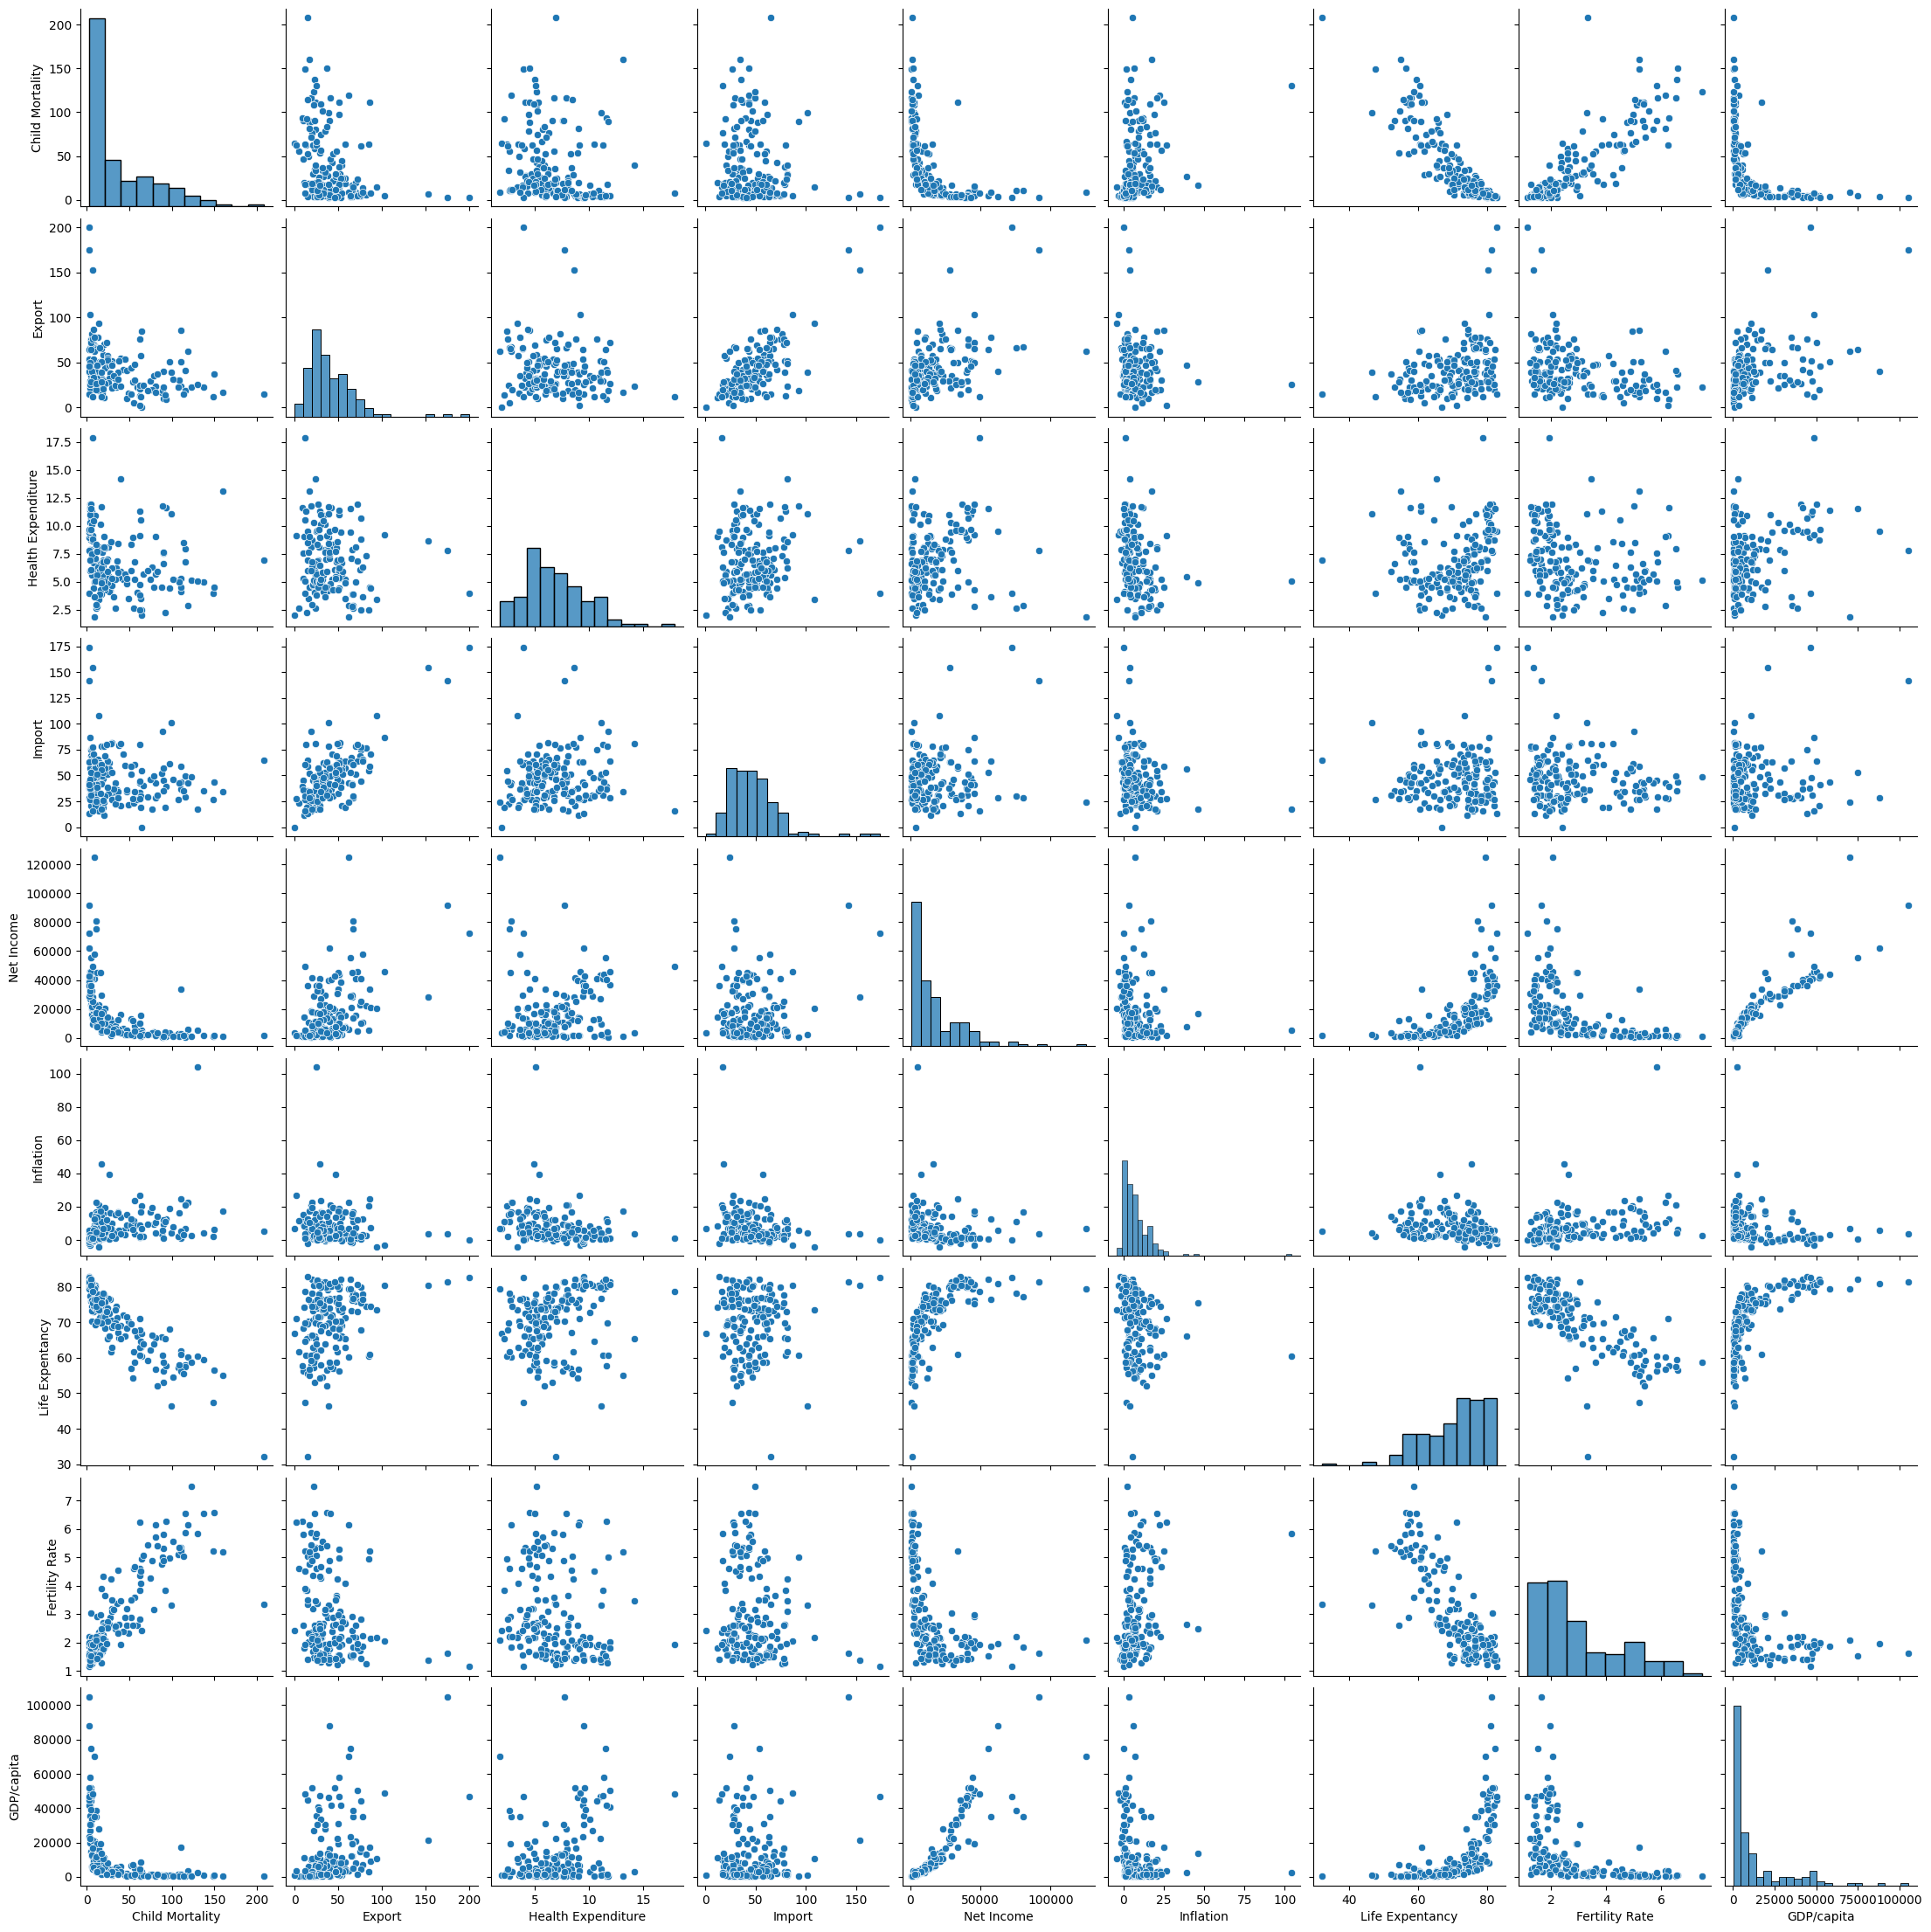

In [10]:
# EDA Part 1 (Multivariate Analysis)
sns.pairplot(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             167 non-null    object 
 1   Child Mortality     167 non-null    float64
 2   Export              167 non-null    float64
 3   Health Expenditure  167 non-null    float64
 4   Import              167 non-null    float64
 5   Net Income          167 non-null    int64  
 6   Inflation           167 non-null    float64
 7   Life Expentancy     167 non-null    float64
 8   Fertility Rate      167 non-null    float64
 9   GDP/capita          167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<AxesSubplot: xlabel='Child Mortality'>

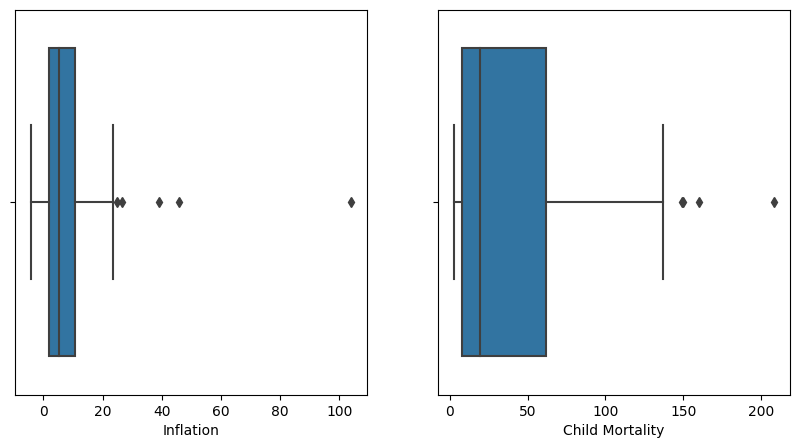

In [3]:
# Check Missing Values
df.info()
# Setelah dicek dengan menggunakan df.info hasil menunjukan semua dari 167 baris semua kolum mengeluarkan hasil 167 non-null (tidak ada yang kosong)

# Check Outliers
figure, axes = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(ax=axes[0], data=df, x='Inflation')
sns.boxplot(ax=axes[1], data=df, x='Child Mortality')
# Dilihat dari boxplot terdapat outliers pada 2 kolumn yang dipilih

Outliers Inflation pada  [] [ 24.9  39.2 104.   26.5  45.9] 
 Outliers Child Mortality pada  [] [149. 150. 208. 160.]


<AxesSubplot: xlabel='Child Mortality'>

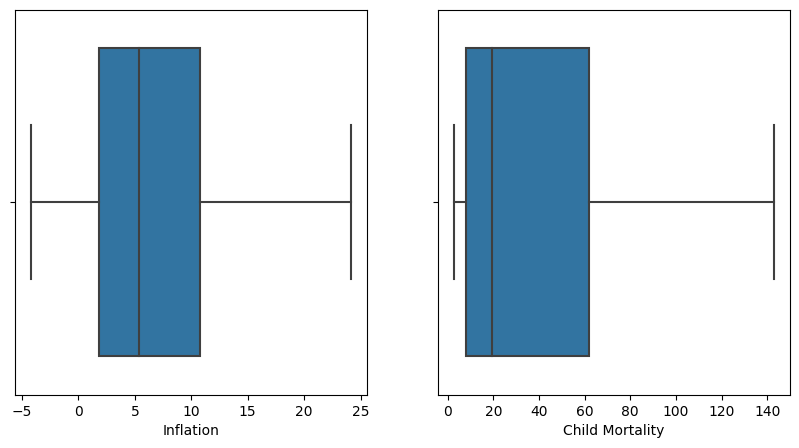

In [14]:
# Handling outliers
def get_lower_upper(x):
    Q1= np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR= Q3-Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    return lower_bound, upper_bound

def cek_outliers(x):
    lower_bound, upper_bound = get_lower_upper(x)
    lower = x[np.where((x < lower_bound))]
    upper = x[np.where((x > upper_bound))]
    return lower, upper, upper_bound

lower1, upper1, upper_bound1 = cek_outliers(df['Inflation'].values)
lower2, upper2, upper_bound2 = cek_outliers(df['Child Mortality'].values)

print('Outliers Inflation pada ', lower1, upper1, 
'\n Outliers Child Mortality pada ', lower2, upper2)

# Jika dilihat dari output tidak ada outlier pada lower, jadi kita hanya perlu handle di upper bound nya saja
# nilai yang lebih dari upper bound akan diganti dengan nilai upper bound.
# melaukan duplikasi df agar data asli tetap terjaga.
df_ori = df.copy()

df['Inflation'].replace(to_replace=upper1, value=upper_bound1, inplace=True)
df['Child Mortality'].replace(to_replace=upper2, value=upper_bound2, inplace=True)

# Check Outliers
figure, axes = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(ax=axes[0], data=df, x='Inflation')
sns.boxplot(ax=axes[1], data=df, x='Child Mortality')



,Country,Child Mortality,Export,Health Expenditure,Import,Net Income,Inflation,Life Expentancy,Fertility Rate,GDP/capita
0,Equatorial Guinea,111.000,85.8,4.48,58.9,33700,24.16,60.9,5.21,17100
1,Nigeria,130.000,25.3,5.07,17.4,5150,24.16,60.5,5.84,2330
2,Mongolia,26.100,46.7,5.44,56.7,7710,24.16,66.2,2.64,2650
3,Venezuela,17.100,28.5,4.91,17.6,16500,24.16,75.4,2.47,13500
4,Timor-Leste,62.600,2.2,9.12,27.8,1850,24.16,71.1,6.23,3600
5,Yemen,56.300,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
6,Sri Lanka,11.200,19.6,2.94,26.8,8560,22.80,74.4,2.20,2810
7,Angola,119.000,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
8,Argentina,14.500,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
9,"Congo, Dem. Rep.",116.000,41.1,7.91,49.6,609,20.80,57.5,6.54,334


<AxesSubplot: xlabel='Country', ylabel='Inflation'>

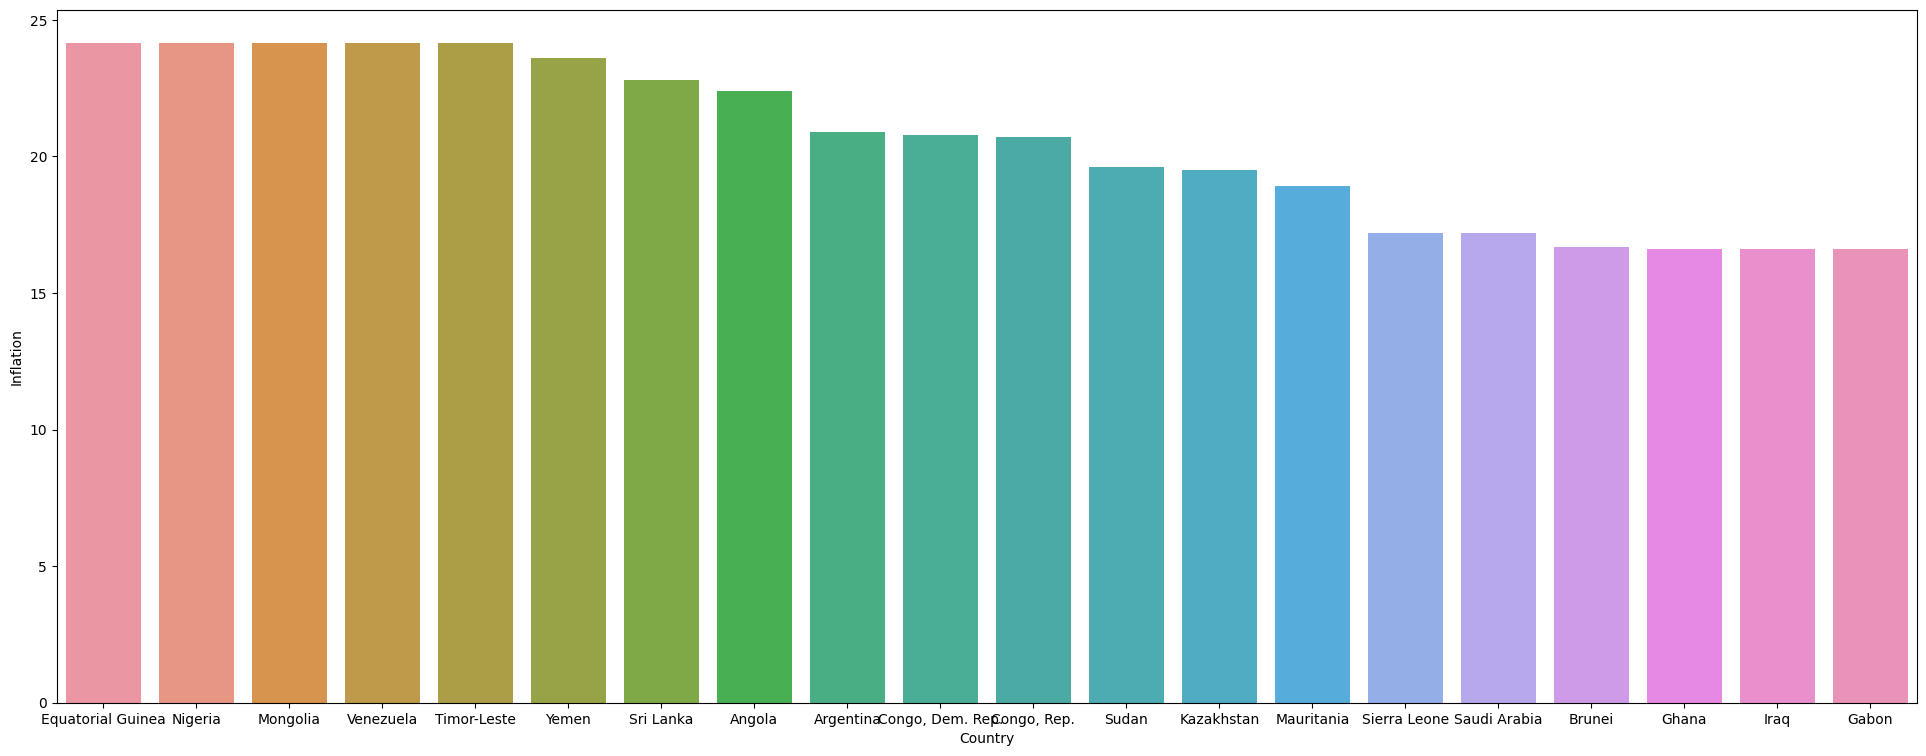

In [18]:
# Prepare Data menjadi top 20 negara saja
df_inflation = df.sort_values(by=['Inflation'], ascending=False).head(20)
df_inflation.reset_index(drop=True, inplace=True)
display(df_inflation)

# Univariate Analysis menggunakan barplot
plt.subplots(figsize=(24,9))
sns.barplot(data=df_inflation, x='Country', y='Inflation', linewidth=0)


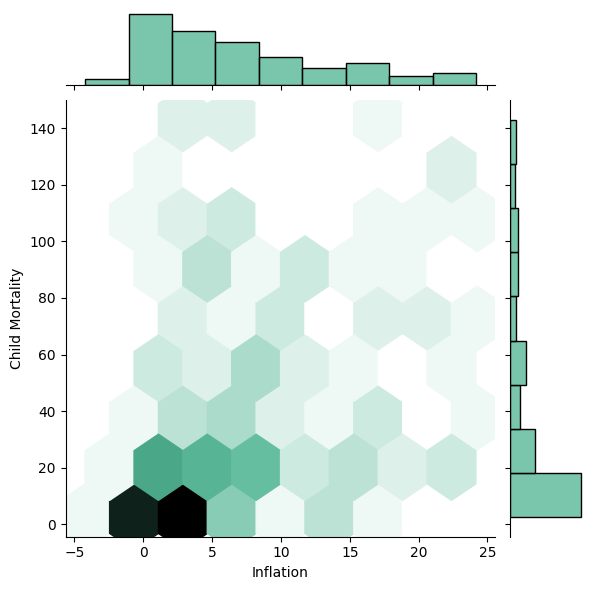

In [110]:
sns.jointplot(data=df, x='Inflation', y='Child Mortality', kind="hex", color="#4CB391")

---
---

## 3. Clustering
1. Scale the Data
<br><br>
2. Decide the number of clusters, you're free to choose the method:
    - Elbow method
    - Silhouette score method
    - Directly decide the number (Elaborate the number and why)
<br><br>
3. Do clustering with the decided amount of cluster.
<br><br>
4. Create the clustering result graph.

In [7]:
# import fungsi
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

,Inflation,Child Mortality
0,9.44,90.2
1,4.49,16.6
2,16.10,27.3
3,22.40,119.0
4,1.44,10.3
...,...,...
162,2.62,29.2
163,24.16,17.1
164,12.10,23.3
165,23.60,56.3


,Country,Inflation,Child Mortality
0,Afghanistan,9.44,90.2
1,Albania,4.49,16.6
2,Algeria,16.10,27.3
3,Angola,22.40,119.0
4,Antigua and Barbuda,1.44,10.3
...,...,...,...
162,Vanuatu,2.62,29.2
163,Venezuela,24.16,17.1
164,Vietnam,12.10,23.3
165,Yemen,23.60,56.3


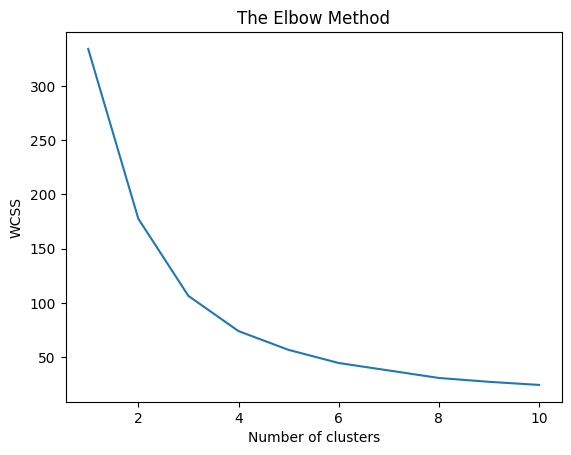

In [19]:
df_new = df[['Inflation', 'Child Mortality']]
display(df_new)
display(df[['Country','Inflation', 'Child Mortality']])

# Rescaling data
sc = StandardScaler()
df_std = sc.fit_transform(df_new.astype(float))
new_df_std = pd.DataFrame(data = df_std, columns=['Inflation', 'Child Mortality'])

# elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(new_df_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

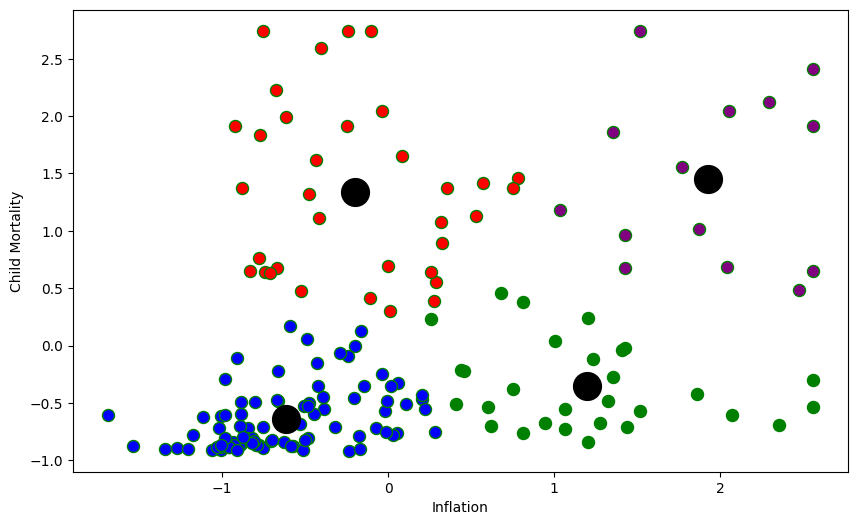

In [20]:
kmeans2 = KMeans(n_clusters=4, random_state=42).fit(df_std)
labels2 = kmeans2.labels_

new_df_std['label_kmeans2'] = labels2

# Clustering data
plt.figure(figsize=(10,6))
plt.scatter(new_df_std['Inflation'][new_df_std.label_kmeans2 == 0], new_df_std['Child Mortality'][new_df_std.label_kmeans2 == 0], c='green', s=75, edgecolor='green', linestyle='-')
plt.scatter(new_df_std['Inflation'][new_df_std.label_kmeans2 == 1], new_df_std['Child Mortality'][new_df_std.label_kmeans2 == 1], c='red', s=75, edgecolor='green', linestyle='-')
plt.scatter(new_df_std['Inflation'][new_df_std.label_kmeans2 == 2], new_df_std['Child Mortality'][new_df_std.label_kmeans2 == 2], c='blue', s=75, edgecolor='green', linestyle='-')
plt.scatter(new_df_std['Inflation'][new_df_std.label_kmeans2 == 3], new_df_std['Child Mortality'][new_df_std.label_kmeans2 == 3], c='purple', s=75, edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=400)
plt.xlabel('Inflation')
plt.ylabel('Child Mortality')
plt.show()

---
---

## 4. Recommendation

1. Choose which country cluster to focus.
<br><br>
2. Show which countries included in that cluster.
<br><br>

,Inflation,Child Mortality,label_kmeans2
3,2.293979,2.121210,3
37,2.054632,2.042939,3
38,2.039673,0.683620,3
49,2.557260,1.912486,3
55,1.426347,0.678402,3
59,1.426347,0.965398,3
63,1.351551,1.860305,3
99,1.770408,1.557654,3
113,2.557260,2.408207,3
132,1.516102,2.744123,3


,Country,Child Mortality,Export,Health Expenditure,Import,Net Income,Inflation,Life Expentancy,Fertility Rate,GDP/capita
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.7,60.4,4.95,2740
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
55,Gabon,63.7,57.7,3.50,18.9,15400,16.6,62.9,4.08,8750
59,Ghana,74.7,29.5,5.22,45.9,3060,16.6,62.2,4.27,1310
63,Guinea,109.0,30.3,4.93,43.2,1190,16.1,58.0,5.34,648
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.9,68.2,4.98,1200
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.2,55.0,5.20,399


Text(0, 0.5, 'Child Mortality')

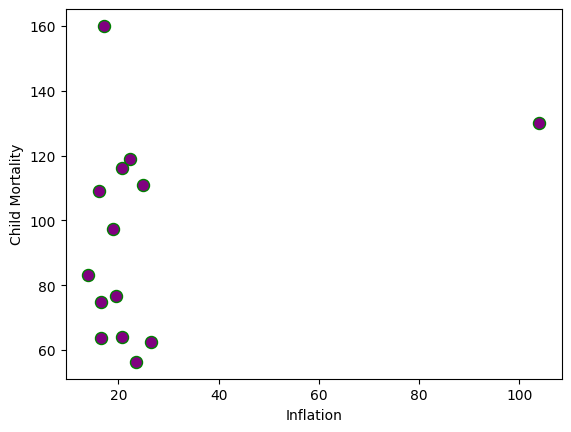

In [22]:
# Tabel dari Negara Cluster ungu
display(new_df_std[new_df_std.label_kmeans2 == 3])

# Mengambil data asli berdasarlan index dari cluster ungu
priority = df_ori.iloc[new_df_std[new_df_std.label_kmeans2 == 3].index]

# Menampilkan data asli dari negara cluster ungu
display(priority)

# Scatter Plot Cluster Ungu dengan data asli
plt.scatter(priority['Inflation'], priority['Child Mortality'], c='purple', s=75, edgecolor='green', linestyle='-')
plt.xlabel('Inflation')
plt.ylabel('Child Mortality')


,Country,Child Mortality,Export,Health Expenditure,Import,Net Income,Inflation,Life Expentancy,Fertility Rate,GDP/capita
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.2,55.0,5.20,399
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
63,Guinea,109.0,30.3,4.93,43.2,1190,16.1,58.0,5.34,648
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.9,68.2,4.98,1200
166,Zambia,83.1,37.0,5.89,30.9,3280,14.0,52.0,5.40,1460
142,Sudan,76.7,19.7,6.32,17.2,3370,19.6,66.3,4.88,1480
59,Ghana,74.7,29.5,5.22,45.9,3060,16.6,62.2,4.27,1310


<AxesSubplot: xlabel='Country', ylabel='Child Mortality'>

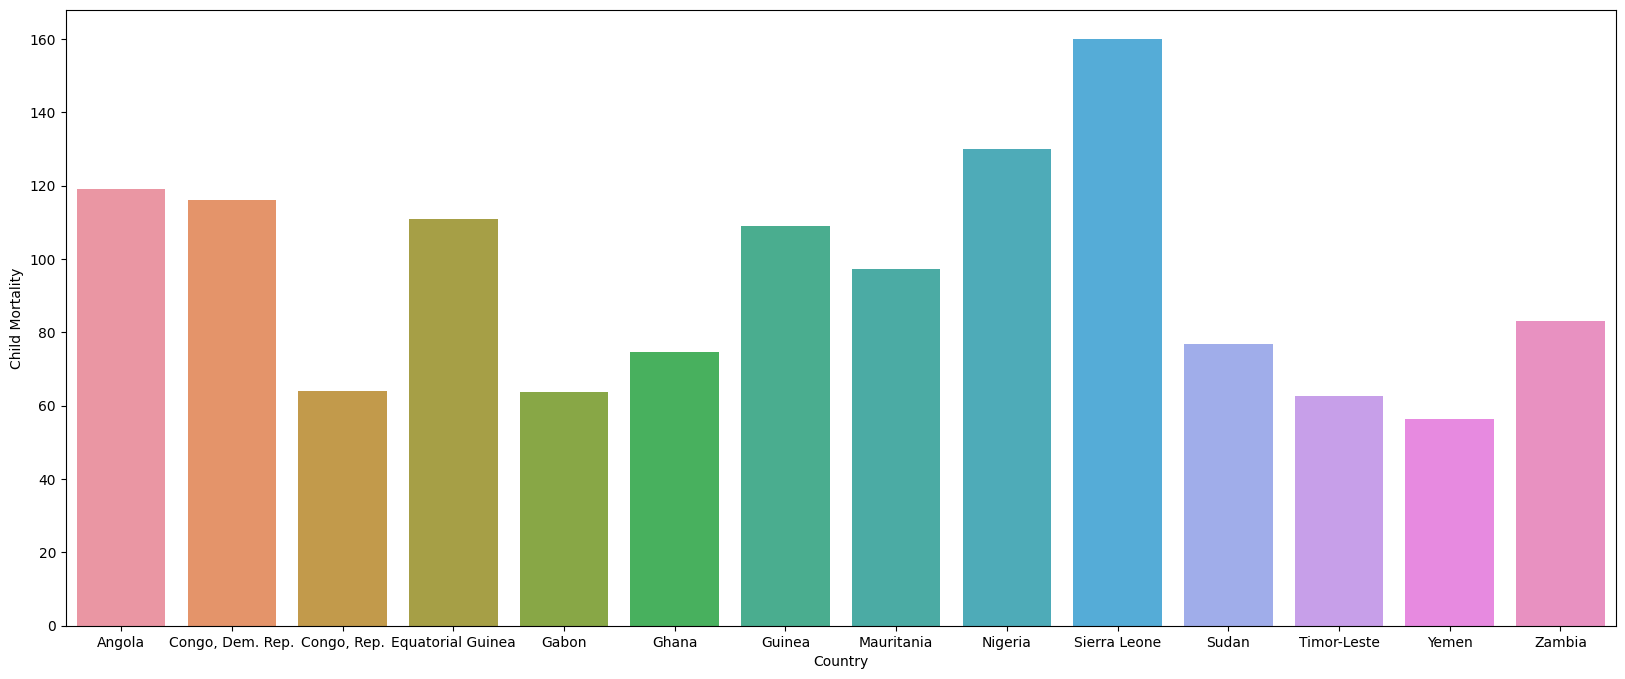

In [29]:
display(priority.sort_values(by=['Child Mortality'], ascending=False))

plt.subplots(figsize=(20,8))
sns.barplot(data=priority, x="Country", y="Child Mortality")

---
---